In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.models import save_model, load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from math import floor


# Keeping this as a reference for how we created the data
#train1 = pd.read_csv('train_1.csv', sep=',', header=0)
#train2 = pd.read_csv('train_2.csv', sep=',', header=0)
#train3 = pd.read_csv('train_3.csv', sep=',', header=0)
#train4 = pd.read_csv('train_4.csv', sep=',', header=0)
#train = pd.concat([train1, train2, train3, train4], ignore_index=True)
#test = pd.read_csv('test.csv', header=0)
#train = train[train['store_nbr'] == 1]
#train = train.drop(columns=["id", "store_nbr"], axis=1)
#train_data = train.pivot_table(index=['date'], columns="family", values='sales')
#train_data["total_sales"] = train_data[list(train_data.columns[1:])].sum(axis=1)
#amt = floor(len(train_data)*.8)
#test_data = train_data[amt:]
#train_data = train_data[:amt]



In [2]:
def parse_data(column_index, scaler):

    store_1_data = pd.read_csv("train_data_store_1.csv")
    if column_index == (len(store_1_data.columns)-1):
        total_sales = store_1_data.iloc[:,-1:].values
    else:
        total_sales = store_1_data.iloc[:, column_index: (column_index+1 if (column_index+1) <= (len(store_1_data.columns) - 1) else -1) ].values
 
    training_set = total_sales[:floor(len(total_sales)*.8)]
    testing_set = total_sales[floor(len(total_sales)*.8):]
    scaled_data = scaler.fit_transform(training_set)
    X_train = []
    y_train = []
    for i in range(14, len(training_set)):
        X_train.append(scaled_data[i-14:i, 0])
        y_train.append(scaled_data[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    return X_train, y_train, total_sales, training_set, testing_set
def create_model(X_train):
    model = Sequential()
    model.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, return_sequences=True))
    model.add(LSTM(units=60))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
    return model







In [3]:

def train_fit_predict(column_index, epochs, batch_size):
    scaler = MinMaxScaler(feature_range=(0,1))
    X_train, y_train, column_data, training_set, testing_set = parse_data(column_index, scaler)
    model = create_model(X_train)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    total_sales = column_data
    data = pd.DataFrame(total_sales[len(total_sales) - len(testing_set) - 14:]).values
    data = data.reshape(-1, 1)
    data = scaler.transform(data)
    X_test = []
    for i in range(14, len(testing_set)):
        X_test.append(data[i-14:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    pred = model.predict(X_test)
    pred = scaler.inverse_transform(pred)
    return pred, testing_set

In [4]:
#Save model
#model.save('austin_model_save')

In [5]:
#Load model
#model = load_model('austin_model_save')

In [6]:
def predict_column(column_index_to_test, epochs, batch_size):
    pred, testing_set = train_fit_predict(column_index_to_test, epochs, batch_size)
    colNames = pd.read_csv("train_data_store_1.csv").columns
    plt.plot(testing_set[:-14], color='blue', label=f'{colNames[column_index_to_test]} Sales')
    plt.plot(pred, color='red', label=f'{colNames[column_index_to_test]} Predicted Total Sales')
    plt.title(f"Store 1 {colNames[column_index_to_test].title()} sales")
    plt.legend()

Epoch 1/100
42/42 [==============================] - 6s 15ms/step - loss: 0.0157
Epoch 2/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0141
Epoch 3/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0139
Epoch 4/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0142
Epoch 5/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0139
Epoch 6/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0142
Epoch 7/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0142
Epoch 8/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0139
Epoch 9/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0140
Epoch 10/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0139
Epoch 11/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0139
Epoch 12/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0139
Epoch 13/100
42/42 [=====

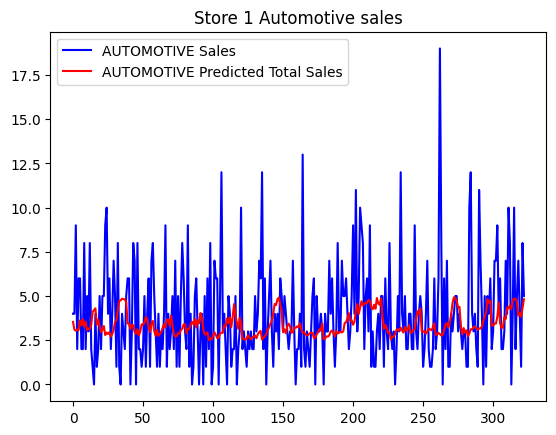

In [7]:
predict_column(1, 100, 32)

Epoch 1/100
42/42 [==============================] - 5s 14ms/step - loss: 0.0000e+00
Epoch 2/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0000e+00
Epoch 3/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0000e+00
Epoch 4/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0000e+00
Epoch 5/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0000e+00
Epoch 6/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0000e+00
Epoch 7/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0000e+00
Epoch 8/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0000e+00
Epoch 9/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0000e+00
Epoch 10/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0000e+00
Epoch 11/100
42/42 [==============================] - 1s 13ms/step - loss: 0.0000e+00
Epoch 12/100
42/42 [==============================] - 1s 14ms/s

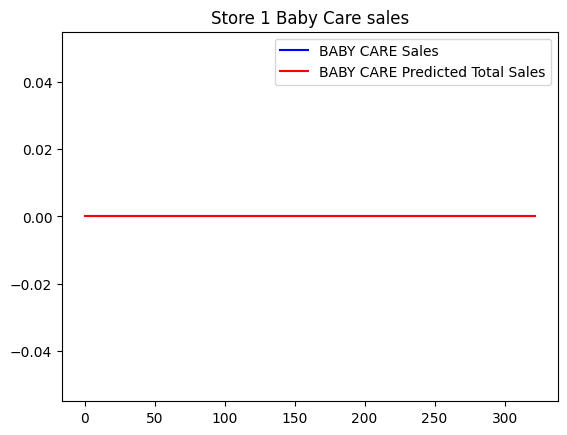

In [8]:
predict_column(2, 100, 32)

Epoch 1/100
42/42 [==============================] - 6s 15ms/step - loss: 0.0154
Epoch 2/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0139
Epoch 3/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0138
Epoch 4/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0137
Epoch 5/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0138
Epoch 6/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0137
Epoch 7/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0139
Epoch 8/100
42/42 [==============================] - 1s 14ms/step - loss: 0.0138
Epoch 9/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0139
Epoch 10/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0140
Epoch 11/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0136
Epoch 12/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0135
Epoch 13/100
42/42 [=====

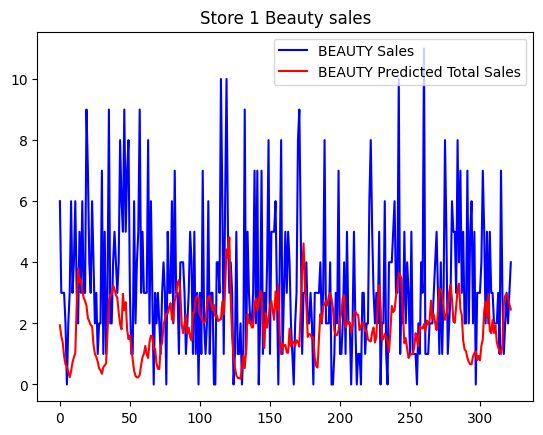

In [9]:
predict_column(3, 100, 32)

Epoch 1/100
42/42 [==============================] - 6s 17ms/step - loss: 0.0144
Epoch 2/100
42/42 [==============================] - 1s 16ms/step - loss: 0.0061
Epoch 3/100
42/42 [==============================] - 1s 16ms/step - loss: 0.0058
Epoch 4/100
42/42 [==============================] - 1s 16ms/step - loss: 0.0061
Epoch 5/100
42/42 [==============================] - 1s 16ms/step - loss: 0.0058
Epoch 6/100
42/42 [==============================] - 1s 16ms/step - loss: 0.0059
Epoch 7/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0056
Epoch 8/100
42/42 [==============================] - 1s 16ms/step - loss: 0.0057
Epoch 9/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0058
Epoch 10/100
42/42 [==============================] - 1s 15ms/step - loss: 0.0056
Epoch 11/100
42/42 [==============================] - 1s 16ms/step - loss: 0.0057
Epoch 12/100
42/42 [==============================] - 1s 16ms/step - loss: 0.0055
Epoch 13/100
42/42 [=====

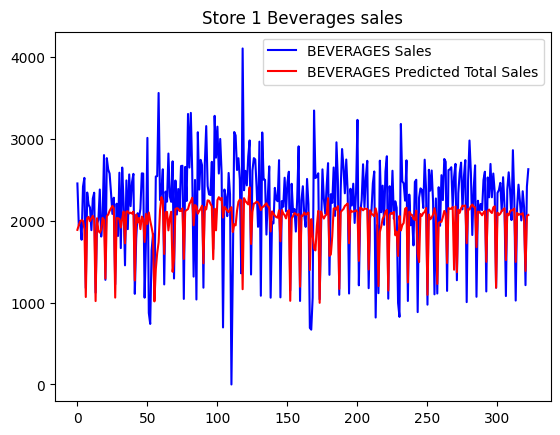

In [10]:
predict_column(4, 100, 32)